In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
col_names= ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
data_Frame = pd.read_csv('C:/Users/Swetha/Documents/AP-ARCH/Training/abalone.csv', header=None, names=col_names)


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data_Frame.columns:
    if data_Frame[column].dtype == type(object):
       # le = LabelEncoder()
        data_Frame[column] = le.fit_transform(data_Frame[column])
X = np.array(data_Frame.iloc[:, 1:7])
Y = np.array(data_Frame.iloc[:,0]) 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=9)
y_train=y_train.ravel()
y_test=y_test.ravel()
# ravel() used to merge two numpy colums into one


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors = 9, weights='uniform', algorithm='auto')
model.fit(X_train, y_train) 
predictions = model.predict(X_test)
Accuracy= accuracy_score(y_test,predictions)*100
print(classification_report(y_test,predictions))
# Accuracy of our model is 
print('Accuracy of our model is equal ' + str(round(Accuracy,2))) # creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append((scores.mean()))
print (predictions)

             precision    recall  f1-score   support

          0       0.47      0.45      0.46       342
          1       0.68      0.78      0.73       325
          2       0.51      0.47      0.49       378

avg / total       0.55      0.56      0.55      1045

Accuracy of our model is equal 56.08
[2 1 1 ... 0 2 2]


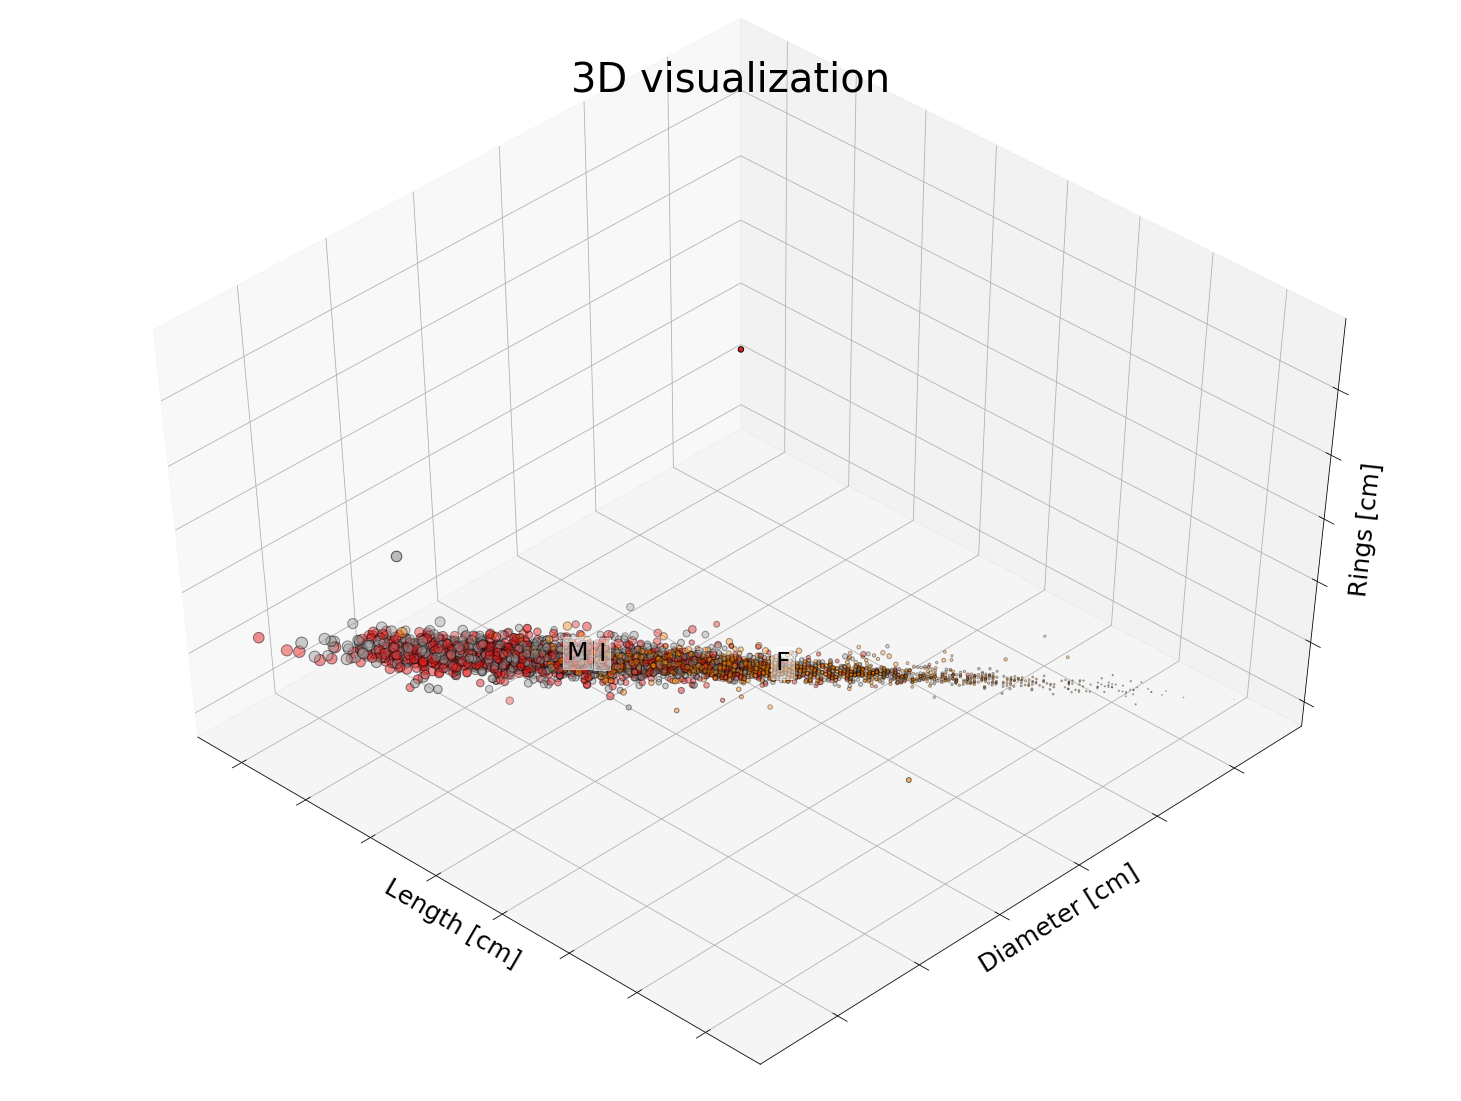

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('M', 0), ('F', 1), ('I', 2)]:
    ax.text3D(X[Y == label, 0].mean(),
              X[Y == label, 1].mean(),
              X[Y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Diameter [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Rings [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [15]:
#Building confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
cm = confusion_matrix(y_test, predictions)
cm

array([[153,  56, 133],
       [ 33, 255,  37],
       [138,  62, 178]], dtype=int64)

In [16]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


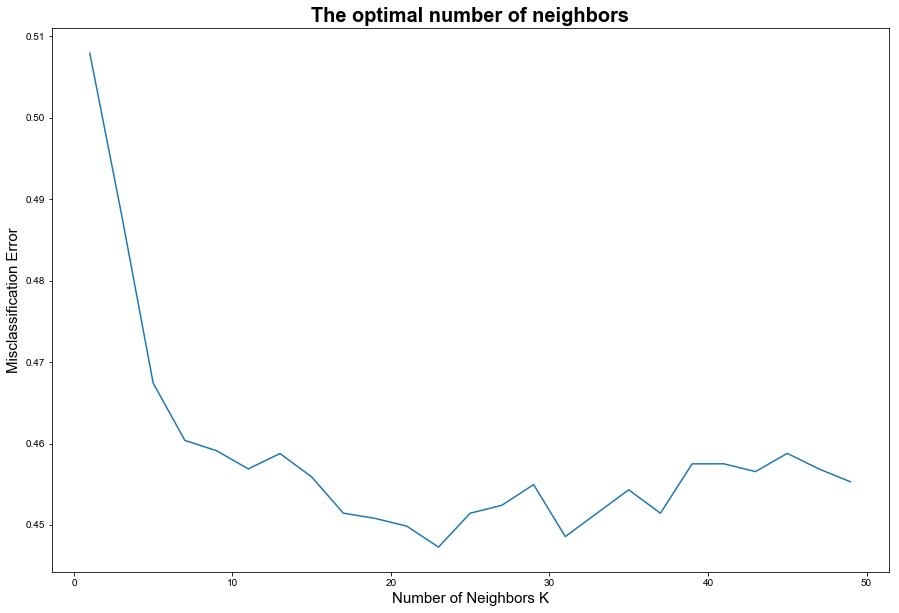

In [17]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [18]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 23.
